In [ ]:
!pip install -q klib
!pip install -q pandas-profiling
!pip install -q --pre pycaret
!pip install -q category_encoders
!pip install -q catboost
!pip install -q pandas-profiling
!pip install -q shap
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import numpy as np
import pandas as pd
import category_encoders as ce
# pd.set_option('max_columns', None)
# from pandas_profiling import ProfileReport
from ydata_profiling import ProfileReport

from sklearn.impute import SimpleImputer
import klib
import shap

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import preprocessing

from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, f1_score
from pandas.api.types import is_numeric_dtype
import catboost as cb
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier, Pool

In [ ]:
data = pd.read_csv("claimData.csv", index_col=None, dtype={'place_of_service_code': 'category', 'is_denial': 'category'})

In [ ]:
data.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access
/usr/local/lib/python3.10/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access


Unnamed: 0 is_denial  unitCharge  units   age  diagnosis_count  \
0           1         0      133.97    1.0   NaN              3.0   
1           2         0      138.10    NaN  67.0              NaN   
2           3         0         NaN    1.0  75.0              1.0   
3           4         0      103.30    NaN  13.0              2.0   
4           5         0       80.84    NaN  36.0              3.0   

   modifier_count  position    firm_id using_rcm  ... diagnosis_code_3  \
0             0.0       1.0  219-pod27     False  ...         T81.33XA   
1             1.0       3.0   45-pod33     False  ...          UNKNOWN   
2             1.0       1.0  137-pod03     False  ...          UNKNOWN   
3             NaN       2.0  275-pod06       NaN  ...          UNKNOWN   
4             1.0       1.0  191-pod02     False  ...         S30.95XA   

  diagnosis_code_4 state payer_code  \
0          UNKNOWN    NJ      22099   
1          UNKNOWN    FL      87726   
2          UNKNOWN    FL      09102   
3              NaN    OH      00021   
4          UNKNOWN    CO      62308   

                                          payer_name  \
0  Blue Cross and Blue Shield of New Jersey (Hori...   
1                    United HealthCare of all states   
2  Medicare of Florida / First Coast Service Opt ...   
3                Blue Cross and Blue Shield of Texas   
4                                 Aetna Health Plans   

  primary_insurance_policy_type primary_insurance_policy_relationship  \
0                           POS                                  SELF   
1                  ACA_EXCHANGE                                  SELF   
2              COMMERCIAL_OTHER                                  SELF   
3                           NaN                                 CHILD   
4              COMMERCIAL_OTHER                                  SELF   

  place_of_service_code service_year is_approved  
0                    11       2021.0           1  
1                    11       2020.0           1  
2                   NaN       2020.0           1  
3                    11       2020.0           1  
4                    11       2021.0           1  

[5 rows x 30 columns]

In [ ]:
data.columns

Index(['Unnamed: 0', 'is_denial', 'unitCharge', 'units', 'age',
       'diagnosis_count', 'modifier_count', 'position', 'firm_id', 'using_rcm',
       'cpt_code', 'cpt_code_description', 'sex', 'itemType',
       'modifier_code_1', 'modifier_code_2', 'modifier_code_3',
       'modifier_code_4', 'diagnosis_code_1', 'diagnosis_code_2',
       'diagnosis_code_3', 'diagnosis_code_4', 'state', 'payer_code',
       'payer_name', 'primary_insurance_policy_type',
       'primary_insurance_policy_relationship', 'place_of_service_code',
       'service_year', 'is_approved'],
      dtype='object')

In [ ]:
data = data.drop(['Unnamed: 0','firm_id','service_year','cpt_code_description','state','payer_name','is_approved','using_rcm','diagnosis_code_4','modifier_count','modifier_code_1','modifier_code_2','modifier_code_3','modifier_code_4'], axis=1)
data = data.rename(columns = {'primary_insurance_policy_type':'pipt','primary_insurance_policy_relationship':'pipr','place_of_service_code':'psc'})

In [ ]:
data.columns

Index(['is_denial', 'unitCharge', 'units', 'age', 'diagnosis_count',
       'position', 'cpt_code', 'sex', 'itemType', 'diagnosis_code_1',
       'diagnosis_code_2', 'diagnosis_code_3', 'payer_code', 'pipt', 'pipr',
       'psc'],
      dtype='object')

In [ ]:
# prompt: get the unique values of itemType

unique_item_types = data['psc'].unique()
print(unique_item_types)


['11', NaN, '81', '24', '02', ..., '51', '31', '01', 'UNKNOWN', '13']
Length: 15
Categories (14, object): ['01', '02', '11', '12', ..., '51', '72', '81', 'UNKNOWN']


In [ ]:
import klib
cdata = klib.data_cleaning(data)

cdata.reset_index(drop=True, inplace=True)
# from pandas_profiling import ProfileReport
prof = ProfileReport(cdata)
#prof.to_widgets()
prof.to_notebook_iframe()
prof.to_file(output_file='ClaimDataProfile.html')

Shape of cleaned data: (999967, 16) - Remaining NAs: 1499916


Dropped rows: 10033
     of which 10033 duplicates. (Rows (first 150 shown): [257573, 339604, 343282, 361243, 376695, 414927, 438744, 441158, 461223, 464831, 485762, 487705, 505225, 528071, 537441, 560014, 580425, 606480, 621791, 637002, 665220, 666300, 686565, 700790, 716227, 752764, 754250, 760210, 782622, 789116, 796582, 894425, 916153, 980241, 990100, 1000000, 1000001, 1000002, 1000003, 1000004, 1000005, 1000006, 1000007, 1000008, 1000009, 1000010, 1000011, 1000012, 1000013, 1000014, 1000015, 1000016, 1000017, 1000018, 1000019, 1000020, 1000021, 1000022, 1000023, 1000024, 1000025, 1000026, 1000027, 1000028, 1000029, 1000030, 1000031, 1000032, 1000033, 1000034, 1000035, 1000036, 1000037, 1000038, 1000039, 1000040, 1000041, 1000042, 1000043, 1000044, 1000045, 1000046, 1000047, 1000048, 1000049, 1000050, 1000051, 1000052, 1000053, 1000054, 1000055, 1000056, 1000057, 1000058, 1000059, 1000060, 1000061, 1000062, 1000063, 100

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Imputation & Cleaning

In [ ]:
data0 = data.query('is_denial == "0"')
# Select numeric columns only
numeric_cols = data0.select_dtypes(include=['number'])

# Fill NaN values in the numeric columns with their mean
data0[numeric_cols.columns] = data0[numeric_cols.columns].fillna(numeric_cols.mean())
# data0.fillna(data0.mean())

<ipython-input-9-1f1b40f89d54>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data0[numeric_cols.columns] = data0[numeric_cols.columns].fillna(numeric_cols.mean())


In [ ]:
imputer = SimpleImputer(missing_values = np.nan,strategy ='most_frequent')
imputer = imputer.fit(data0)
data_with_imputed_values0  = pd.DataFrame(imputer.transform(data0))
data_with_imputed_values0.columns = data.columns
#data_with_imputed_values0.head()

In [ ]:
data1 = data.query('is_denial == "1" ')
# Select numeric columns only
numeric_cols1 = data1.select_dtypes(include=['number'])

# Fill NaN values in the numeric columns with their mean
data1[numeric_cols1.columns] = data1[numeric_cols1.columns].fillna(numeric_cols1.mean())
# data1.fillna(data1.mean())

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan,strategy ='most_frequent')
imputer = imputer.fit(data1)
data_with_imputed_values1  = pd.DataFrame(imputer.transform(data1)).copy()
data_with_imputed_values1.columns = data.columns
#data_with_imputed_values1.head()

<ipython-input-11-be1e255f4ce7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[numeric_cols1.columns] = data1[numeric_cols1.columns].fillna(numeric_cols1.mean())


In [ ]:
data_clean = pd.concat([data_with_imputed_values0, data_with_imputed_values1], ignore_index=True)
data_clean[['unitCharge', 'units','age','diagnosis_count','position']] = data_clean[['unitCharge', 'units','age','diagnosis_count','position']].round(0).astype(int)
data_clean.shape

(1010000, 16)

In [ ]:
kdf = klib.data_cleaning(data_clean)
kdf = klib.convert_datatypes(data_clean)
kdf.info()

Shape of cleaned data: (999562, 16) - Remaining NAs: 0


Dropped rows: 10438
     of which 10438 duplicates. (Rows (first 150 shown): [25694, 53024, 67120, 77077, 80657, 93221, 105550, 106422, 119234, 132137, 132589, 133694, 141117, 151192, 151676, 152806, 153007, 153434, 159312, 160907, 164729, 168852, 176007, 180223, 182315, 184449, 185003, 195262, 195723, 201007, 201207, 209114, 209185, 212845, 214834, 215215, 219706, 222554, 225327, 227426, 229623, 238850, 239998, 240454, 242623, 243697, 245284, 250460, 253570, 256158, 257573, 258406, 261264, 262388, 264096, 271159, 274791, 277704, 279821, 280775, 281499, 283402, 285775, 292950, 296158, 299624, 299679, 300774, 305838, 313101, 329333, 333542, 334052, 335832, 337461, 338198, 339604, 339764, 341255, 341931, 343282, 343352, 344316, 346422, 349622, 351939, 357928, 361243, 362246, 363490, 363735, 365929, 367210, 367702, 368449, 368455, 368881, 369164, 372264, 372425, 372484, 375728, 376695, 380980, 381165, 381632, 383178, 386779, 392711,

In [ ]:
kdf.reset_index(drop=True, inplace=True)
kdf.head()

is_denial  unitCharge  units  age  diagnosis_count  position cpt_code  \
0         0         133      1   58                3         1    99203   
1         0         138      1   67                1         3    99203   
2         0         321      1   75                1         1    99203   
3         0         103      1   13                2         2    17110   
4         0          80      1   36                3         1    12032   

      sex itemType diagnosis_code_1 diagnosis_code_2 diagnosis_code_3  \
0  FEMALE      CPT          L02.423          I83.025         T81.33XA   
1  FEMALE      CPT            A30.9          UNKNOWN          UNKNOWN   
2    MALE      CPT           Z15.09          UNKNOWN          UNKNOWN   
3  FEMALE  UNKNOWN         S80.911A            L68.2          UNKNOWN   
4  FEMALE      CPT         S80.811A         S00.30XA         S30.95XA   

  payer_code              pipt   pipr psc  
0      22099               POS   SELF  11  
1      87726      ACA_EXCHANGE   SELF  11  
2      09102  COMMERCIAL_OTHER   SELF  11  
3      00021          MEDICARE  CHILD  11  
4      62308  COMMERCIAL_OTHER   SELF  11

In [ ]:
data_clean.shape

(1010000, 16)

In [ ]:
data_clean = data_clean.drop_duplicates()

In [ ]:
data_clean.shape

(999562, 16)

## Preparing data for model

In [ ]:
mdf, data_test = train_test_split(kdf, stratify=data["is_denial"], test_size=0.20)

In [ ]:
X = mdf[['unitCharge', 'units', 'age', 'diagnosis_count',
       'position', 'cpt_code', 'sex',
       'itemType', 'diagnosis_code_1',
       'diagnosis_code_2', 'diagnosis_code_3',
       'payer_code', 'pipt', 'pipr', 'psc']]
y = mdf['is_denial']

In [ ]:
import pandas as pd
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split
import catboost as cb
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def get_categorical_indicies(X):
    cats = []
    for col in X.columns:
        if is_numeric_dtype(X[col]):
            pass
        else:
            cats.append(col)
    cat_indicies = []
    for col in cats:
        cat_indicies.append(X.columns.get_loc(col))
    return cat_indicies

categorical_indicies = get_categorical_indicies(X)

In [ ]:
def convert_cats(X):
    cats = []
    for col in X.columns:
        if is_numeric_dtype(X[col]):
            pass
    else:
        cats.append(col)
    cat_indicies = []
    for col in cats:
        X[col] = X[col].astype('category')
convert_cats(X)

<ipython-input-21-287eed15609c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('category')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

train_dataset = cb.Pool(X_train,y_train, cat_features=categorical_indicies)
test_dataset = cb.Pool(X_test,y_test, cat_features=categorical_indicies)

model = cb.CatBoostClassifier(loss_function='Logloss', eval_metric='Accuracy', verbose = False)

grid = {'learning_rate': [0.03, 0.1],'depth': [4, 6, 10],'l2_leaf_reg': [1, 3, 5,],'iterations': [50, 100, 150]}

model.grid_search(grid,train_dataset,verbose = False)


bestTest = 0.8567837252
bestIteration = 49


bestTest = 0.8770730198
bestIteration = 48


bestTest = 0.8574566832
bestIteration = 49


bestTest = 0.8771735767
bestIteration = 49


bestTest = 0.8560024752
bestIteration = 49


bestTest = 0.8777846535
bestIteration = 49


bestTest = 0.8692218441
bestIteration = 99


bestTest = 0.8815903465
bestIteration = 95


bestTest = 0.8696240718
bestIteration = 99


bestTest = 0.8817063738
bestIteration = 99


bestTest = 0.8682858911
bestIteration = 99


bestTest = 0.8815748762
bestIteration = 96


bestTest = 0.8754022277
bestIteration = 149


bestTest = 0.8824876238
bestIteration = 148


bestTest = 0.8755646658
bestIteration = 148


bestTest = 0.882657797
bestIteration = 149


bestTest = 0.8760829208
bestIteration = 148


bestTest = 0.8826964728
bestIteration = 149


bestTest = 0.8691212871
bestIteration = 49


bestTest = 0.8811649134
bestIteration = 48


bestTest = 0.8679842203
bestIteration = 49


bestTest = 0.8805461015
bestIteration = 49


best

{'params': {'depth': 10,
  'learning_rate': 0.1,
  'l2_leaf_reg': 3,
  'iterations': 150},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45

In [ ]:
model.get_feature_importance()

array([23.71362743,  0.20727444, 19.2393204 ,  0.49527745,  5.39236434,
        9.94180306,  0.30911713,  2.38963913, 16.48829624,  0.13900278,
        0.        , 19.61243146,  0.52186109,  1.05735348,  0.49263157])

## Performance of the Model

In [ ]:
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93    129274
           1       0.84      0.52      0.64     32326

    accuracy                           0.88    161600
   macro avg       0.87      0.75      0.79    161600
weighted avg       0.88      0.88      0.87    161600



In [ ]:
val_data = (X_test, y_test)

Accuracy = 0.8840594059405941
ROC AUC = 0.7465788848119621


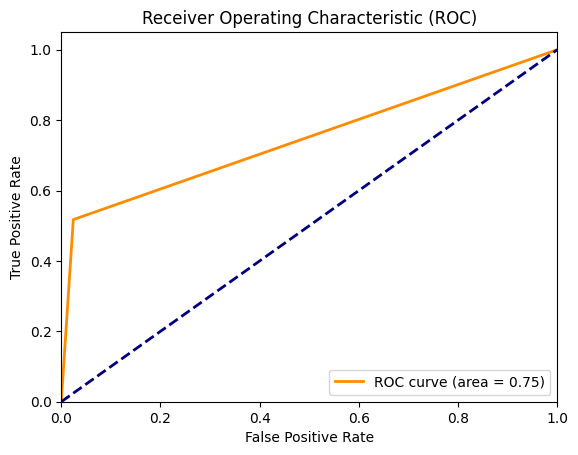

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score
def validate(model, val_data):
    # Get predictions
    y_pred = model.predict(val_data[0])

    # Copy the labels to avoid modifying the tuple
    y_true = val_data[1]

    # Ensure y_pred and y_true are both numerical
    if isinstance(y_pred[0], str):  # Check if the predictions are strings
        le = LabelEncoder()
        y_pred = le.fit_transform(y_pred)
        y_true = le.transform(y_true)  # Transform the true labels as well

    # Calculate metrics
    print('Accuracy =', accuracy_score(y_pred, y_true))
    print('ROC AUC =', roc_auc_score(y_true, y_pred))  # Note that true labels should come first

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_true, y_pred))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

# Call the validate function with model and val_data
validate(model, val_data)

In [ ]:
## saving Model on Disk
model.save_model("model1.pkl")
from_file = CatBoostClassifier()
from_file.load_model("model1.pkl")

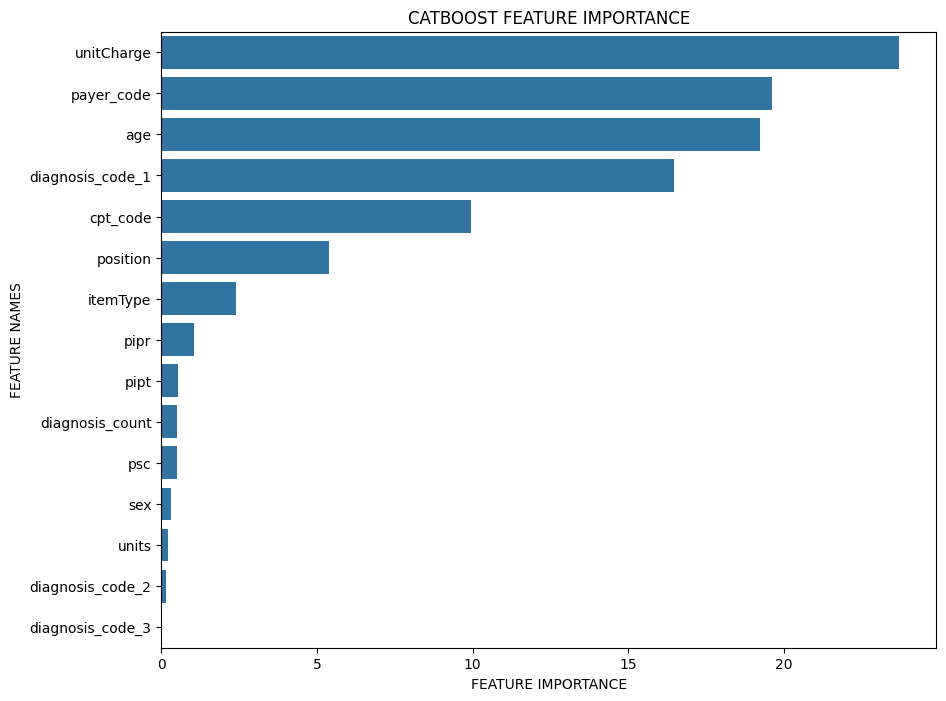

In [ ]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

plot_feature_importance(model.get_feature_importance(),X_train.columns,'CATBOOST')

In [ ]:
model.calc_feature_statistics(test_dataset,feature='diagnosis_count',plot=True,prediction_type='Class')

{'borders': array([1.5, 2.5, 3.5], dtype=float32),
 'binarized_feature': array([2, 2, 0, ..., 3, 0, 0]),
 'mean_target': array([0.21922831, 0.1593271 , 0.15630458, 0.12690872], dtype=float32),
 'mean_weighted_target': array([], dtype=float32),
 'mean_prediction': array([0.13892986, 0.08578475, 0.08912808, 0.05997625], dtype=float32),
 'objects_per_bin': array([117275,  11354,  21183,  11788], dtype=uint32),
 'predictions_on_varying_feature': array([0.12394802, 0.12115099, 0.12151609, 0.11800124])}

In [ ]:
model.calc_feature_statistics(test_dataset,feature='age',plot=True,prediction_type='Class')

{'borders': array([ 8.5, 11.5, 12.5, 16.5, 22.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5,
        30.5, 45.5, 47.5, 48.5, 52.5, 53.5, 54.5, 55.5, 56.5, 57.5, 58.5,
        59.5, 60.5, 61.5, 64.5, 65.5, 66.5, 68.5, 69.5, 70.5, 71.5, 72.5,
        73.5, 74.5, 75.5, 80.5, 81.5], dtype=float32),
 'binarized_feature': array([21, 12, 27, ..., 21, 38, 28]),
 'mean_target': array([0.20265004, 0.24086957, 0.22805344, 0.27703783, 0.29003683,
        0.32108316, 0.3234597 , 0.28785983, 0.25474253, 0.22801788,
        0.19823788, 0.1943128 , 0.1896499 , 0.2260128 , 0.2276176 ,
        0.2241312 , 0.22553192, 0.8285018 , 0.17492417, 0.17261055,
        0.17633274, 0.02317411, 0.1921606 , 0.19096091, 0.18819188,
        0.171383  , 0.17293645, 0.17664233, 0.1890413 , 0.19166303,
        0.1897867 , 0.20365722, 0.19399917, 0.18914396, 0.16826226,
        0.16848725, 0.16647059, 0.17924528, 0.18629332], dtype=float32),
 'mean_weighted_target': array([], dtype=float32),
 'mean_prediction': array([0.12392829

In [ ]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

The above explanation shows features each contributing to push the model output from the base value (the average model output over the training dataset we passed) to the model output. Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue.

If we take many explanations such as the one shown above, rotate them 90 degrees, and then stack them horizontally, we can see explanations for an entire dataset (in the notebook this plot is interactive)

In [ ]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values[0:100,:], X.iloc[0:100,:])

To get an overview of which features are most important for a model we can plot the SHAP values of every feature for every sample. The plot below sorts features by the sum of SHAP value magnitudes over all samples, and uses SHAP values to show the distribution of the impacts each feature has on the model output. The color represents the feature value (red high, blue low). This reveals for example that a high Diagnosis Counts less chances your claim will be deny.   

same analysis we can do for all variables age, unitCharge, position, units and modifier_count_2


other categorical variables with high counts such as diagnosis_codes, payer_codes are encoded by catboost so hard to explain.

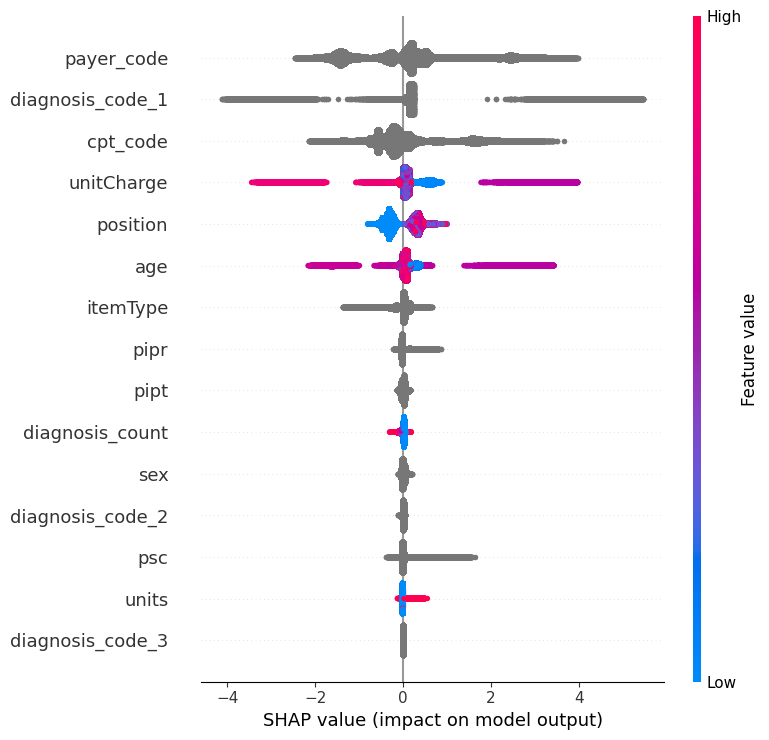

In [ ]:
shap.summary_plot(shap_values, X)

This plot is made of many dots. Each dot has three characteristics:

Vertical location shows what feature it is depicting
Color shows whether that feature was high or low for that row of the dataset
Horizontal location shows whether the effect of that value caused a higher or lower prediction.

# Converting Model To REST API (FastAPI)

In [ ]:
!pip install fastapi
!pip install uvicorn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.1 MB/s eta 0:00:00


In [ ]:
# 1. Library imports
import pandas as pd
from pycaret.regression import load_model, predict_model
from fastapi import FastAPI
import uvicorn

# 2. Create the app object
app = FastAPI()

#. Load trained Pipeline
model = load_model('model1.pkl')

# Define predict function
@app.post('/predict')
def predict(unitCharge,units,age,diagnosis_count,modifier_count,position,using_rcm,cpt_code,sex,itemType,modifier_code_1,modifier_code_2,modifier_code_3,modifier_code_4,diagnosis_code_1,diagnosis_code_2,diagnosis_code_3,diagnosis_code_4,payer_code,pipt,pipr,psc):
    data = pd.DataFrame([[unitCharge,units,age,diagnosis_count,modifier_count,position,using_rcm,cpt_code,sex,itemType,modifier_code_1,modifier_code_2,modifier_code_3,modifier_code_4,diagnosis_code_1,diagnosis_code_2,diagnosis_code_3,diagnosis_code_4,payer_code,pipt,pipr,psc]])
    data.columns = ['unitCharge','units','age','diagnosis_count','modifier_count','position','using_rcm','cpt_code','sex','itemType','modifier_code_1','modifier_code_2','modifier_code_3','modifier_code_4','diagnosis_code_1','diagnosis_code_2','diagnosis_code_3','diagnosis_code_4','payer_code','pipt','pipr','psc']

    predictions = predict_model(model, data=data)
    return {'prediction': int(predictions['Label'][0])}

if __name__ == '__main__':
    uvicorn.run(app, host='127.0.0.1', port=8000)

FileNotFoundError: [Errno 2] No such file or directory: 'model1.pkl.pkl'

# Deploy Model as Rest API on AWS Lambda (ServerLess Architecture)

In [ ]:
# Execution Role : FastApiLambdaRole
# RunTime : Python 3.8
# Layer1 (ARN) : arn:aws:lambda:us-west-2:446751924810:layer:python-3-8-scikit-learn-0-23-1:4
# Layer2 (Custom) : pythonpackage(FastAPI libs)

import json
import joblib
import re
import string
from bs4 import BeautifulSoup
import numpy as np

from fastapi import FastAPI
from pydantic import BaseModel
from mangum import Mangum
import tempfile
import boto3

s3_client = boto3.client("s3")


# Declaring our FastAPI instance
app = FastAPI()
lambda_handler = Mangum(app)

# Defining path operation for root endpoint
@app.get("/")
def main():
    return {"message": "Welcome to AI!"}

class request_body(BaseModel):
        unitCharge: string
        units: string
        age: string
        diagnosis_count: string
        modifier_count: string
        position: string: stringusing_rcm: string
        cpt_code: string
        sex: string
        itemType: string
        modifier_code_1: string
        modifier_code_2: string
        modifier_code_3: string
        modifier_code_4: string
        diagnosis_code_1: string
        diagnosis_code_2: string
        diagnosis_code_3: string
        diagnosis_code_4: string
        payer_code: string
        pipt: string
        pipr: string
        psc: string

@app.post("/SimulatedClaimData")
def ClaimData(data: request_body):

        # READ Model From S3
        with tempfile.TemporaryFile() as fp:
            s3_client.download_fileobj(
                Fileobj=fp,
                Bucket="###-ai-s3-dev",
                Key="./Final catboost Model 04Feb2023.pkl",
            )
            fp.seek(0)
            model = joblib.load(fp)
            prediction = predict_model(model, data=data_unseen)
            prediction.[0]
return {prediction.[0]}

